# Machine Learning Data

On predefined **toy datasets**, synthetic **data generation**, **data preprocessing** and **data visualization**.

## Data from Seaborn Data Repository

Seaborn provides a [Data repository](https://github.com/mwaskom/seaborn-data) for seaborn examples

In [15]:
import seaborn as sns
data = sns.load_dataset('tips')                      # returns a Pandas DataFrame

In [16]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Synthetic Data Generation

Install [scikit-learn](https://scikit-learn.org/stable/index.html) with `conda install scikit-learn`

The `sklearn.datasets` module includes utilities to load datasets, including methods to load and fetch popular reference datasets. It also features some artificial data generators.

### Two Interleaving Half Circles

A simple toy dataset to visualize clustering and classification algorithms.

In [52]:
from sklearn.datasets import make_moons

X, y = make_moons(200,noise=0.2)

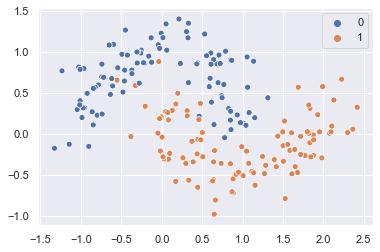

In [53]:
import seaborn as sns
sns.scatterplot(X[:,0], X[:,1], hue=y);

### Random Classification Data

Generate a random n-class classification problem.

In [54]:
import numpy as np
np.random.seed(31415)

from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2)
print(X.shape)
print(y.shape)

(100, 2)
(100,)


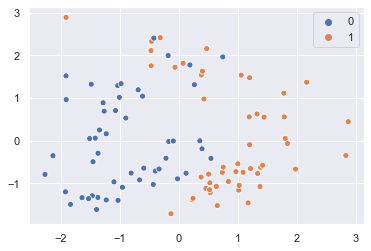

In [55]:
import seaborn as sns
sns.scatterplot(X[:,0], X[:,1], hue=y);

### Random Regression Data

Generate a random regression problem.

In [75]:
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=100, n_features=1, n_informative=1, bias = 50.0, noise = 8, random_state=0)

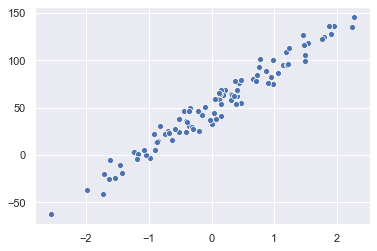

In [86]:
import seaborn as sns
sns.scatterplot(x.flatten(), y);

## Splitting Data with Scikit Learn

Splitting Data into a **training-dataset** and a **testing-dataset**.

In [94]:
import numpy as np
np.random.seed(31415)
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

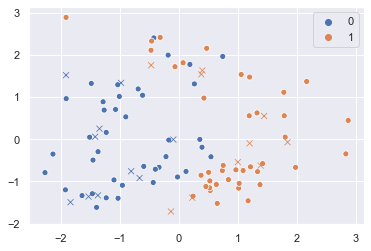

In [96]:
import seaborn as sns
sns.scatterplot(X_train[:,0], X_train[:,1], marker='o', hue=y_train)
sns.scatterplot(X_test[:,0], X_test[:,1], hue=y_test, marker='x', legend=False);

## Splitting Data with Pytorch

Splitting Data into a **training-dataset** and a **testing-dataset**.

In [27]:
import torch
import numpy as np
from sklearn.datasets import make_classification
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataset import random_split
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(31415)

features, targets = make_classification(n_features=2, n_redundant=0, n_informative=2)
dataset = TensorDataset(torch.tensor(features), torch.tensor(targets))
train_datasubset, test_datasubset = random_split(dataset, [80, 20])

X_train, y_train = train_datasubset.dataset.tensors
X_test, y_test = test_datasubset.dataset.tensors

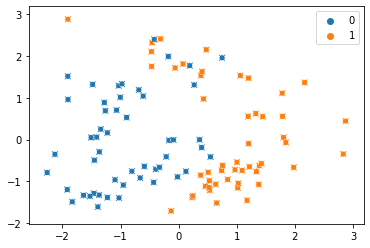

In [28]:
plt.clf()
sns.scatterplot(X_train[:,0], X_train[:,1], hue=y_train)
sns.scatterplot(X_test[:,0], X_test[:,1], hue=y_test, marker='x', legend=False);

## Pytorch Dataloader with Scikit Data

In [31]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification

features, targets = make_classification()
dataset = TensorDataset(torch.tensor(features), torch.tensor(targets))
dataloader = DataLoader(dataset, batch_size=25)

In [32]:
for X, y in dataloader:
    print(f'batch with {len(X)} items')
else:
    print('finished!')

batch with 25 items
batch with 25 items
batch with 25 items
batch with 25 items
finished!


## Plot Decision Boundary of a Binary Classification Ploblem

In [53]:
import torch
import sklearn.datasets

X,y = sklearn.datasets.make_moons(200,noise=0.2)
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

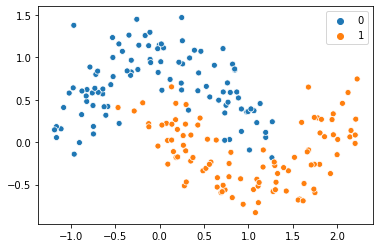

In [54]:
import seaborn as sns
sns.scatterplot(X[:,0] ,X[:,1] , hue=y);

### Neural Network Architecture

In [55]:
import torch.nn as nn
import torch.nn.functional as F

class MyClassifier(nn.Module):
    def __init__(self):
        super(MyClassifier,self).__init__()
        self.fc1 = nn.Linear(2,5)
        self.fc2 = nn.Linear(5,3)
        self.fc3 = nn.Linear(3,2)
        
    def forward(self,x):
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        x = torch.tanh(x)
        x = self.fc3(x)
        return x
        
    def predict(self,x):
        pred = F.softmax(self.forward(x), dim=1)
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

model = MyClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

### Train the Network

In [56]:
epochs = 10000
losses = []

for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred,y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

### Calculate Accuracy

In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(X),y))

1.0


### Print Decision Boundary

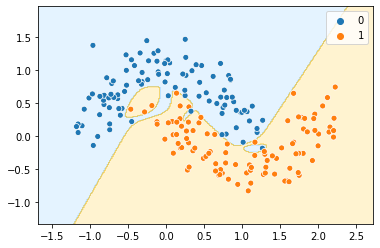

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def predict(x):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()

def plot_decision_boundary(pred_func, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    cmap = colors.ListedColormap(['#74c1ff30', '#ffc10730'])
    boundaries = [0, 0.5, 1]
    norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

    plt.contourf(xx, yy, Z, cmap=cmap, norm=norm)
    sns.scatterplot(X[:, 0], X[:, 1], hue=y)
    
plot_decision_boundary(lambda x : predict(x) ,X.numpy(), y.numpy())